In [1]:
import os, json, gzip 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

import string
import nltk
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('words')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import wordnet, stopwords
stop_words = stopwords.words("english")

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression

import itertools
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/jyotidevenda/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jyotidevenda/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/jyotidevenda/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/jyotidevenda/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     /Users/jyotidevenda/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/jyotidevenda/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [2]:
data = pd.read_csv('amazon_reviews_us_Video_Games_v1_00.tsv',sep='\t',on_bad_lines='skip')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1780268 entries, 0 to 1780267
Data columns (total 15 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   marketplace        object
 1   customer_id        int64 
 2   review_id          object
 3   product_id         object
 4   product_parent     int64 
 5   product_title      object
 6   product_category   object
 7   star_rating        int64 
 8   helpful_votes      int64 
 9   total_votes        int64 
 10  vine               object
 11  verified_purchase  object
 12  review_headline    object
 13  review_body        object
 14  review_date        object
dtypes: int64(5), object(10)
memory usage: 203.7+ MB


In [4]:
data[:10]

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,12039526,RTIS3L2M1F5SM,B001CXYMFS,737716809,Thrustmaster T-Flight Hotas X Flight Stick,Video Games,5,0,0,N,Y,an amazing joystick. I especially love that yo...,"Used this for Elite Dangerous on my mac, an am...",2015-08-31
1,US,9636577,R1ZV7R40OLHKD,B00M920ND6,569686175,Tonsee 6 buttons Wireless Optical Silent Gamin...,Video Games,5,0,0,N,Y,Definitely a silent mouse... Not a single clic...,"Loved it, I didn't even realise it was a gami...",2015-08-31
2,US,2331478,R3BH071QLH8QMC,B0029CSOD2,98937668,Hidden Mysteries: Titanic Secrets of the Fatef...,Video Games,1,0,1,N,Y,One Star,poor quality work and not as it is advertised.,2015-08-31
3,US,52495923,R127K9NTSXA2YH,B00GOOSV98,23143350,GelTabz Performance Thumb Grips - PlayStation ...,Video Games,3,0,0,N,Y,"good, but could be bettee","nice, but tend to slip away from stick in inte...",2015-08-31
4,US,14533949,R32ZWUXDJPW27Q,B00Y074JOM,821342511,Zero Suit Samus amiibo - Japan Import (Super S...,Video Games,4,0,0,N,Y,Great but flawed.,"Great amiibo, great for collecting. Quality ma...",2015-08-31
5,US,2377552,R3AQQ4YUKJWBA6,B002UBI6W6,328764615,Psyclone Recharge Station for Nintendo Wii 4 P...,Video Games,1,0,0,N,Y,One Star,The remote constantly have to be adjusted in o...,2015-08-31
6,US,17521011,R2F0POU5K6F73F,B008XHCLFO,24234603,Protection for your 3DS XL,Video Games,5,0,0,N,Y,A Must,I have a 2012-2013 XL and this is very durable...,2015-08-31
7,US,19676307,R3VNR804HYSMR6,B00BRA9R6A,682267517,Nerf 3DS XL Armor,Video Games,5,0,0,N,Y,Five Stars,"Perfect, kids loved them. Great protection for...",2015-08-31
8,US,224068,R3GZTM72WA2QH,B009EPWJLA,435241890,One Piece: Pirate Warriors / Kaizoku Musou PS3...,Video Games,5,0,0,N,Y,Five Stars,Excelent,2015-08-31
9,US,48467989,RNQOY62705W1K,B0000AV7GB,256572651,Playstation 2 Dance Pad Revolution 2,Video Games,4,0,0,N,Y,Four Stars,Slippery but expected,2015-08-31


In [5]:
data = data.sort_values(by=['review_date'], ascending=False)
df = data[['star_rating','review_body']]
# drop any rows w/ missing values
df = df.dropna()

In [6]:
# Function to map stars to sentiment
def map_sentiment(stars_received):
    if stars_received <= 2:
        return -1
    elif stars_received == 3:
        return 0
    else:
        return 1
    
# Mapping stars to sentiment into three categories
df['star_rating_v1'] = [ map_sentiment(x) for x in df['star_rating']]

In [7]:
# discover the actual counts
df.star_rating_v1.value_counts()

 1    1340582
-1     286178
 0     153449
Name: star_rating_v1, dtype: int64

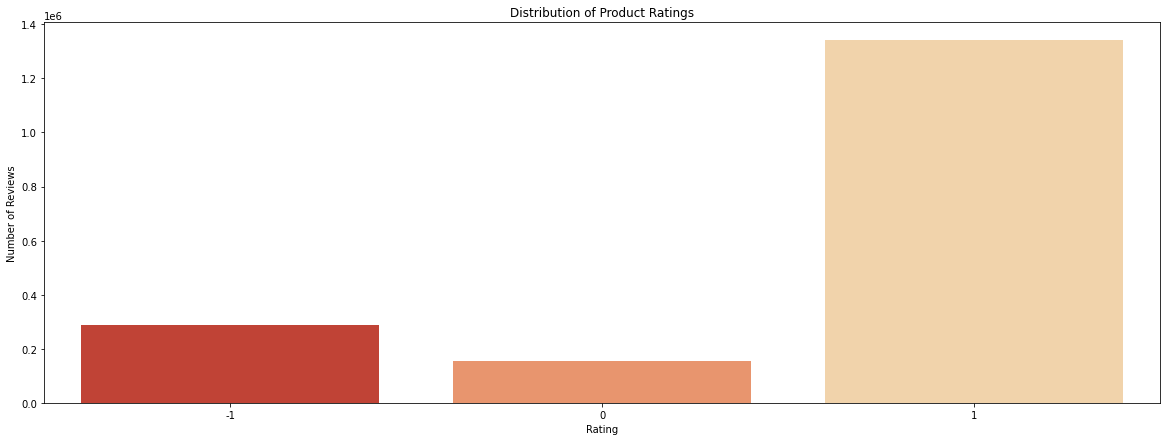

In [8]:
f, axes = plt.subplots(figsize=(20,7))
ax = sns.countplot(x=df["star_rating_v1"], palette="OrRd_r")
ax.set(title="Distribution of Product Ratings", \
       xlabel="Rating", ylabel="Number of Reviews")
plt.show()

In [9]:
# set sample size to labels w/ minimum count
sample_size = 15000
df_equal_overall = pd.DataFrame()
for i in df.star_rating_v1.unique():
    X = df[df.star_rating_v1 == i].sample(sample_size)
    df_equal_overall = df_equal_overall.append(X)

In [10]:
stopwords_list = stopwords.words('english')

def ReviewProcessing(df):
    # remove non alphanumeric 
    df['review_cleaned'] = df.review_body.str.replace('[^a-zA-Z0-9 ]', '')
    
    # lowercase
    df.review_cleaned = df.review_cleaned.str.lower()
    
    # split into list
    df.review_cleaned = df.review_cleaned.str.split(' ')
    
    # remove stopwords
    df.review_cleaned = df.review_cleaned.apply(lambda x: [item for item in x if item not in stopwords_list])
    return df

In [11]:
def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

lemmatizer = nltk.stem.WordNetLemmatizer()

def get_lemmatize(sent):
    return " ".join([lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in nltk.word_tokenize(sent)])

In [12]:
clean_data = ReviewProcessing(df_equal_overall)
clean_data.review_cleaned = clean_data.review_cleaned.apply(' '.join)
clean_data['review_cleaned_lemmatized'] = clean_data.review_cleaned.apply(get_lemmatize)

In [13]:
#dropping rows where review_cleaned_lemmatized is empty string
clean_data['review_cleaned_lemmatized'].replace('', np.nan, inplace=True)
clean_data.dropna(subset=['review_cleaned_lemmatized'], inplace=True)

In [14]:
x = clean_data['review_cleaned_lemmatized']
y = clean_data['star_rating_v1']
X_train, X_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.2, stratify=y, random_state = 44)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, stratify=y_train, random_state=44) 
#0.25 x 0.8 = 0.2

In [15]:
# Multinomial Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB

nb = Pipeline([('vectorize', CountVectorizer(ngram_range=(1, 2))),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])

In [16]:
nb.fit(X_train, y_train)

y_train_pred_nb = nb.predict(X_train)
y_val_pred_nb = nb.predict(X_val)

print(f"Training Set Accuracy: {accuracy_score(y_train, y_train_pred_nb)*100:.3f}%")
print(f"Validation Set Accuracy: {accuracy_score(y_val, y_val_pred_nb)*100:.3f}%")

print(f"Training Set F1 Score: {f1_score(y_train, y_train_pred_nb, average='micro'):.3f}")
print(f"Validation Set F1 Score: {f1_score(y_val, y_val_pred_nb, average='micro'):.3f}")

Training Set Accuracy: 89.786%
Validation Set Accuracy: 62.462%
Training Set F1 Score: 0.898
Validation Set F1 Score: 0.625


In [17]:
# SGD Classifier
from sklearn.linear_model import SGDClassifier

sgd = Pipeline([('vect', CountVectorizer(ngram_range=(1, 2))),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier()),
               ])

In [18]:
sgd.fit(X_train, y_train)

y_train_pred_sgd = sgd.predict(X_train)
y_val_pred_sgd = sgd.predict(X_val)

print(f"Training Set Accuracy: {accuracy_score(y_train, y_train_pred_sgd)*100:.3f}%")
print(f"Validation Set Accuracy: {accuracy_score(y_val, y_val_pred_sgd)*100:.3f}%")

print(f"Training Set F1 Score: {f1_score(y_train, y_train_pred_sgd, average='micro'):.3f}")
print(f"Validation Set F1 Score: {f1_score(y_val, y_val_pred_sgd, average='micro'):.3f}")

Training Set Accuracy: 88.974%
Validation Set Accuracy: 68.001%
Training Set F1 Score: 0.890
Validation Set F1 Score: 0.680


In [19]:
#random forest classifier
from sklearn.ensemble import RandomForestClassifier

rnd = Pipeline([('vect', CountVectorizer(ngram_range=(1, 2))),
                ('tfidf', TfidfTransformer()),
                ('clf', RandomForestClassifier(random_state=42, n_estimators=10)),
               ])

In [20]:
rnd.fit(X_train, y_train)

y_train_pred_rnd = rnd.predict(X_train)
y_val_pred_rnd = rnd.predict(X_val)

print(f"Training Set Accuracy: {accuracy_score(y_train, y_train_pred_rnd)*100:.3f}%")
print(f"Validation Set Accuracy: {accuracy_score(y_val, y_val_pred_rnd)*100:.3f}%")

print(f"Training Set F1 Score: {f1_score(y_train, y_train_pred_rnd, average='micro'):.3f}")
print(f"Validation Set F1 Score: {f1_score(y_val, y_val_pred_rnd, average='micro'):.3f}")

Training Set Accuracy: 98.398%
Validation Set Accuracy: 55.689%
Training Set F1 Score: 0.984
Validation Set F1 Score: 0.557


In [21]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

logreg = Pipeline([('vect', CountVectorizer(ngram_range=(1, 2))),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(max_iter=500)),
               ])

In [22]:
logreg.fit(X_train, y_train)

y_train_pred_log = logreg.predict(X_train)
y_val_pred_log = logreg.predict(X_val)


print(f"Training Set Accuracy: {accuracy_score(y_train, y_train_pred_log)*100:.3f}%")
print(f"Validation Set Accuracy: {accuracy_score(y_val, y_val_pred_log)*100:.3f}%")

print(f"Training Set F1 Score: {f1_score(y_train, y_train_pred_log, average='micro'):.3f}")
print(f"Validation Set F1 Score: {f1_score(y_val, y_val_pred_log, average='micro'):.3f}")

Training Set Accuracy: 92.470%
Validation Set Accuracy: 68.101%
Training Set F1 Score: 0.925
Validation Set F1 Score: 0.681


In [23]:
# Linear support vector classifier
from sklearn.svm import SVC

svc = Pipeline([('vect', CountVectorizer(ngram_range=(1, 2))),
                ('tfidf', TfidfTransformer()),
                ('clf', SVC()),
               ])

In [24]:
svc.fit(X_train, y_train)

y_train_pred_svc = svc.predict(X_train)
y_val_pred_svc = svc.predict(X_val)

print(f"Training Set Accuracy: {accuracy_score(y_train, y_train_pred_svc)*100:.3f}%")
print(f"Validation Set Accuracy: {accuracy_score(y_val, y_val_pred_svc)*100:.3f}%")

print(f"Training Set F1 Score: {f1_score(y_train, y_train_pred_svc, average='micro'):.3f}")
print(f"Validation Set F1 Score: {f1_score(y_val, y_val_pred_svc, average='micro'):.3f}")

Training Set Accuracy: 98.402%
Validation Set Accuracy: 67.990%
Training Set F1 Score: 0.984
Validation Set F1 Score: 0.680


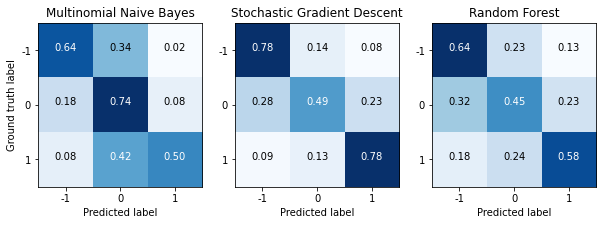

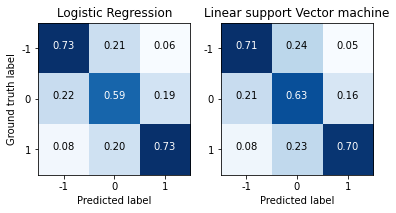

In [25]:
def plot_confusion_matrix(cm, classes, ax, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues, set_y_label = True):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    ax.imshow(cm, interpolation='nearest', cmap=cmap)

    # Add the labels
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        ax.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    ax.set(yticks=[0,1,2], 
            xticks=[0, 1, 2], 
           yticklabels=classes, 
           xticklabels=classes)
    #ax.yaxis.set_major_locator(matplotlib.ticker.IndexLocator(base=1, offset=0.5))
    if title:
        ax.set_title(title)
    if(set_y_label):
      ax.set_ylabel('Ground truth label')
    ax.set_xlabel('Predicted label')
    
fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(10, 10))

plot_confusion_matrix(confusion_matrix(y_val, y_val_pred_nb), ("-1","0", "1"), 
                      ax[0], normalize=True, title = 'Multinomial Naive Bayes')
plot_confusion_matrix(confusion_matrix(y_val, y_val_pred_sgd), ("-1","0", "1"), 
                      ax[1], normalize=True, title = 'Stochastic Gradient Descent',set_y_label = False)
plot_confusion_matrix(confusion_matrix(y_val, y_val_pred_rnd), ("-1","0", "1"), 
                      ax[2], normalize=True, title = 'Random Forest',set_y_label = False)


fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(6, 10))

plot_confusion_matrix(confusion_matrix(y_val, y_val_pred_log), ("-1","0", "1"), 
                      ax[0], normalize=True, title = 'Logistic Regression')
plot_confusion_matrix(confusion_matrix(y_val, y_val_pred_svc), ("-1","0", "1"), 
                      ax[1], normalize=True, title = 'Linear support Vector machine',set_y_label = False)


In [26]:
#hyper parameter tuning on best model - Logistic Regression
from sklearn.model_selection import GridSearchCV

grid=[{'clf__solver': ['lbfgs', 'sag', 'saga'],
       'clf__C': [0.01, 0.1, 1],
       'clf__penalty' : ['l1', 'l2', 'elasticnet', None]}]
lr = GridSearchCV(estimator=logreg, param_grid = grid, scoring='accuracy')
best_model = lr.fit(X_train, y_train)

print("Best hyperparameters:", lr.best_params_)
print("Best score: {:.3f}".format(lr.best_score_))

# set hyperparameters
C_best = lr.best_params_["clf__C"]
clf__penalty_best = lr.best_params_["clf__penalty"]
clf__solver_best = lr.best_params_["clf__solver"]

Best hyperparameters: {'clf__C': 1, 'clf__penalty': 'l2', 'clf__solver': 'saga'}
Best score: 0.674


In [34]:
# train model
logreg = Pipeline([('vect', CountVectorizer(ngram_range=(1, 2))),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(max_iter=500,C = C_best, penalty = clf__penalty_best, solver = clf__solver_best)),
               ])
logreg.fit(X_train, y_train)

y_train_pred_grid = logreg.predict(X_train)
y_val_pred_grid = logreg.predict(X_val)

print(f"Training Set Accuracy: {accuracy_score(y_train, y_train_pred_grid)*100:.3f}%")
print(f"Validation Set Accuracy: {accuracy_score(y_val, y_val_pred_grid)*100:.3f}%")

print(f"Training Set F1 Score: {f1_score(y_train, y_train_pred_grid, average='micro'):.3f}")
print(f"Validation Set F1 Score: {f1_score(y_val, y_val_pred_grid, average='micro'):.3f}")

Training Set Accuracy: 92.232%
Validation Set Accuracy: 68.268%
Training Set F1 Score: 0.922
Validation Set F1 Score: 0.683


In [ ]:
grid=[{'clf__C': [0.01, 0.1, 1],
       'clf__kernel': ['rbf', 'poly']}]
svc_grid = GridSearchCV(svc, param_grid = grid, scoring='accuracy')
best_model_svc = svc_grid.fit(X_train, y_train)

# show results
print("Best hyperparameters:", svc_grid.best_params_)
print("Best score: {:.3f}".format(svc_grid.best_score_))

# set hyperparameters
C_best = svc_grid.best_params_["clf__C"]
clf__kernel_best = svc_grid.best_params_["clf__kernel"]

In [ ]:
svc = Pipeline([('vect', CountVectorizer(ngram_range=(1, 2))),
                ('tfidf', TfidfTransformer()),
                ('clf', SVC(C = C_best, gamma = clf__kernel_best)),
               ])


y_train_pred_grid_svc = svc.predict(X_train)
y_val_pred_grid_svc = svc.predict(X_val)

print(f"Training Set Accuracy: {accuracy_score(y_train, y_train_pred_grid_svc)*100:.3f}%")
print(f"Validation Set Accuracy: {accuracy_score(y_val, y_val_pred_grid_svc)*100:.3f}%")

print(f"Training Set F1 Score: {f1_score(y_train, y_train_pred_grid_svc, average='micro'):.3f}")
print(f"Validation Set F1 Score: {f1_score(y_val, y_val_pred_grid_svc, average='micro'):.3f}")

# Experimenting with glove

In [31]:
import importlib

if importlib.util.find_spec('flair') is None:
    !pip install flair==0.10


import flair
from flair.embeddings import WordEmbeddings, DocumentPoolEmbeddings
from flair.data import Sentence

glove_embeddings = WordEmbeddings('glove')

In [32]:
# initialize the document embeddings, mode = mean
document_embeddings = DocumentPoolEmbeddings([glove_embeddings])

feature_vector = np.zeros((len(clean_data),100))
for i,text in enumerate(clean_data['review_cleaned_lemmatized']):
    sentence_glove = Sentence(text)
    document_embeddings.embed(sentence_glove)
    feature_vector[i] = np.array(sentence_glove.embedding)

In [33]:
x = feature_vector
y = clean_data['star_rating_v1']
X_train, X_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.2, stratify=y, random_state = 44)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, stratify=y_train, random_state=44) 
#0.25 x 0.8 = 0.2

In [34]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

logreg = Pipeline([
                ('clf', LogisticRegression(max_iter=500)),
               ])

In [35]:
logreg.fit(X_train, y_train)

y_train_pred_log = logreg.predict(X_train)
y_val_pred_log = logreg.predict(X_val)


print(f"Training Set Accuracy: {accuracy_score(y_train, y_train_pred_log)*100:.3f}%")
print(f"Test Set Accuracy: {accuracy_score(y_val, y_val_pred_log)*100:.3f}%")

print(f"Training Set F1 Score: {f1_score(y_train, y_train_pred_log, average='micro'):.3f}")
print(f"Test Set F1 Score: {f1_score(y_val, y_val_pred_log, average='micro'):.3f}")


Training Set Accuracy: 60.108%
Test Set Accuracy: 58.870%
Training Set F1 Score: 0.601
Test Set F1 Score: 0.589
